### Introduction to Data Science Cycle with a DataFrame and Prediction Models

Data science is a multidisciplinary field that leverages various techniques and tools to extract meaningful insights from data. This process often involves the complete data science lifecycle, encompassing data collection, data preprocessing, exploratory data analysis (EDA), model building, evaluation, and deployment. In this context, we'll explore the data science cycle using a hypothetical DataFrame and several prediction models, demonstrating the iterative and holistic nature of data science.

**Dataset Description:**

Our dataset, named 'data,' contains information related to sales orders. It includes columns such as 'OrderNumber,' 'SalesChannel,' 'WarehouseCode,' 'ProcuredDate,' 'OrderDate,' 'ShipDate,' 'DeliveryDate,' 'CurrencyCode,' 'SalesTeamID,' 'CustomerID,' 'StoreID,' 'ProductID,' 'OrderQuantity,' 'DiscountApplied,' 'UnitPrice,' 'UnitCost,' 'Month,' 'Week,' and 'IsOnline.' Each row in the dataset represents a unique sales transaction.

**Data Science Cycle Stages:**

1. **Data Collection and Understanding:**
   
   The first step in the data science cycle involves collecting and understanding the dataset. This includes gathering data from various sources, such as databases or APIs, and comprehending the meaning and structure of the data. In our case, the 'data' DataFrame serves as our primary data source, and the column names provide valuable context about the information stored within it.

2. **Data Preprocessing:**

   Data preprocessing is essential to ensure the data is clean, consistent, and ready for analysis. This step often involves handling missing values, removing duplicates, encoding categorical variables, and scaling numerical features. In our examples, we employed techniques like standardization for clustering and datetime conversions for regression.

3. **Exploratory Data Analysis (EDA):**

   EDA is a crucial stage for gaining insights into the dataset's characteristics and relationships among variables. Data visualization plays a significant role in EDA. In our clustering example, we used a scatterplot to visualize the clusters formed by customer segments based on 'OrderQuantity,' 'DiscountApplied,' and 'UnitPrice.'

4. **Model Building:**

   Model building is at the heart of data science, where machine learning models are trained and tested to make predictions or extract patterns from the data. We demonstrated five models: Linear Regression, Random Forest Classifier, K-Means Clustering, Decision Tree Regressor, and Logistic Regression, each with a specific objective based on the dataset columns.

5. **Model Evaluation:**

   After building models, it's crucial to assess their performance using appropriate metrics. For regression models (e.g., Linear Regression and Decision Tree Regressor), we used Root Mean Squared Error (RMSE) to evaluate prediction accuracy. For classification models (e.g., Random Forest Classifier and Logistic Regression), we assessed accuracy and visualized confusion matrices.

6. **Model Deployment:**

   The final stage of the data science cycle involves deploying the models for practical use. This can be in the form of web applications, APIs, or automated pipelines. In our examples, we focused on model building and evaluation, but deployment considerations are crucial for real-world applications.

The data science cycle is iterative, often requiring revisiting previous stages to refine models or incorporate new data. It's a dynamic process aimed at extracting value and insights from data, driving informed decision-making, and solving real-world problems. The choice of models and techniques depends on the specific objectives and nature of the data, as demonstrated in our exploration of the 'data' DataFrame.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv("regional_sales.csv")
data.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost
0,SO - 000101,In-Store,WARE-UHY1004,31/12/2017,31/05/2018,14/06/2018,19/06/2018,USD,6,15,259,12,5,0.075,"1,963.10","1,001.18"
1,SO - 000102,Online,WARE-NMK1003,31/12/2017,31/05/2018,22/06/2018,02/07/2018,USD,14,20,196,27,3,0.075,"3,939.60","3,348.66"
2,SO - 000103,Distributor,WARE-UHY1004,31/12/2017,31/05/2018,21/06/2018,01/07/2018,USD,21,16,213,16,1,0.050,"1,775.50",781.22
3,SO - 000104,Wholesale,WARE-NMK1003,31/12/2017,31/05/2018,02/06/2018,07/06/2018,USD,28,48,107,23,8,0.075,"2,324.90","1,464.69"
4,SO - 000105,Distributor,WARE-NMK1003,10/04/2018,31/05/2018,16/06/2018,26/06/2018,USD,22,49,111,26,8,0.100,"1,822.40","1,476.14"


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OrderNumber       7991 non-null   object 
 1   Sales Channel     7991 non-null   object 
 2   WarehouseCode     7991 non-null   object 
 3   ProcuredDate      7991 non-null   object 
 4   OrderDate         7991 non-null   object 
 5   ShipDate          7991 non-null   object 
 6   DeliveryDate      7991 non-null   object 
 7   CurrencyCode      7991 non-null   object 
 8   _SalesTeamID      7991 non-null   int64  
 9   _CustomerID       7991 non-null   int64  
 10  _StoreID          7991 non-null   int64  
 11  _ProductID        7991 non-null   int64  
 12  Order Quantity    7991 non-null   int64  
 13  Discount Applied  7991 non-null   float64
 14  Unit Price        7991 non-null   object 
 15  Unit Cost         7991 non-null   object 
dtypes: float64(1), int64(5), object(10)
memory

In [9]:
# Converting Unit Price and Unit Cost from object to float
data['Unit Price'] = data['Unit Price'].str.replace(',', '').astype(float)
data['Unit Cost'] = data['Unit Cost'].str.replace(',', '').astype(float)

print(data.head())  # Display the DataFrame with removed commas

   OrderNumber Sales Channel WarehouseCode ProcuredDate   OrderDate  \
0  SO - 000101      In-Store  WARE-UHY1004   31/12/2017  31/05/2018   
1  SO - 000102        Online  WARE-NMK1003   31/12/2017  31/05/2018   
2  SO - 000103   Distributor  WARE-UHY1004   31/12/2017  31/05/2018   
3  SO - 000104     Wholesale  WARE-NMK1003   31/12/2017  31/05/2018   
4  SO - 000105   Distributor  WARE-NMK1003   10/04/2018  31/05/2018   

     ShipDate DeliveryDate CurrencyCode  _SalesTeamID  _CustomerID  _StoreID  \
0  14/06/2018   19/06/2018          USD             6           15       259   
1  22/06/2018   02/07/2018          USD            14           20       196   
2  21/06/2018   01/07/2018          USD            21           16       213   
3  02/06/2018   07/06/2018          USD            28           48       107   
4  16/06/2018   26/06/2018          USD            22           49       111   

   _ProductID  Order Quantity  Discount Applied  Unit Price  Unit Cost  
0          12      

In [10]:
# Renaming columns
data.rename(columns={
    'Sales Channel': 'SalesChannel',
    '_SalesTeamID': 'SalesTeamID',
    '_CustomerID': 'CustomerID',
    '_StoreID': 'StoreID',
    '_ProductID': 'ProductID',
    'Order Quantity': 'OrderQuantity',
    'Discount Applied': 'DiscountApplied',
    'Unit Price': 'UnitPrice',
    'Unit Cost': 'UnitCost'
}, inplace=True)

print(data.head())  # Display the DataFrame with renamed columns

   OrderNumber SalesChannel WarehouseCode ProcuredDate   OrderDate  \
0  SO - 000101     In-Store  WARE-UHY1004   31/12/2017  31/05/2018   
1  SO - 000102       Online  WARE-NMK1003   31/12/2017  31/05/2018   
2  SO - 000103  Distributor  WARE-UHY1004   31/12/2017  31/05/2018   
3  SO - 000104    Wholesale  WARE-NMK1003   31/12/2017  31/05/2018   
4  SO - 000105  Distributor  WARE-NMK1003   10/04/2018  31/05/2018   

     ShipDate DeliveryDate CurrencyCode  SalesTeamID  CustomerID  StoreID  \
0  14/06/2018   19/06/2018          USD            6          15      259   
1  22/06/2018   02/07/2018          USD           14          20      196   
2  21/06/2018   01/07/2018          USD           21          16      213   
3  02/06/2018   07/06/2018          USD           28          48      107   
4  16/06/2018   26/06/2018          USD           22          49      111   

   ProductID  OrderQuantity  DiscountApplied  UnitPrice  UnitCost  
0         12              5            0.075    

In [11]:
#Checking for missing values 
data.isnull().sum()

OrderNumber        0
SalesChannel       0
WarehouseCode      0
ProcuredDate       0
OrderDate          0
ShipDate           0
DeliveryDate       0
CurrencyCode       0
SalesTeamID        0
CustomerID         0
StoreID            0
ProductID          0
OrderQuantity      0
DiscountApplied    0
UnitPrice          0
UnitCost           0
dtype: int64

In [12]:
# List of categorical column names
categorical_columns = ['SalesChannel', 'WarehouseCode', 'CurrencyCode']

# Loop through each categorical column and print unique values
for col in categorical_columns:
    unique_values = data[col].unique()
    print(f"Unique values in {col}: {unique_values}")

Unique values in SalesChannel: ['In-Store' 'Online' 'Distributor' 'Wholesale']
Unique values in WarehouseCode: ['WARE-UHY1004' 'WARE-NMK1003' 'WARE-PUJ1005' 'WARE-XYS1001'
 'WARE-MKL1006' 'WARE-NBV1002']
Unique values in CurrencyCode: ['USD']


Analysing the distribution of sales channels to understand which channel is most popular.

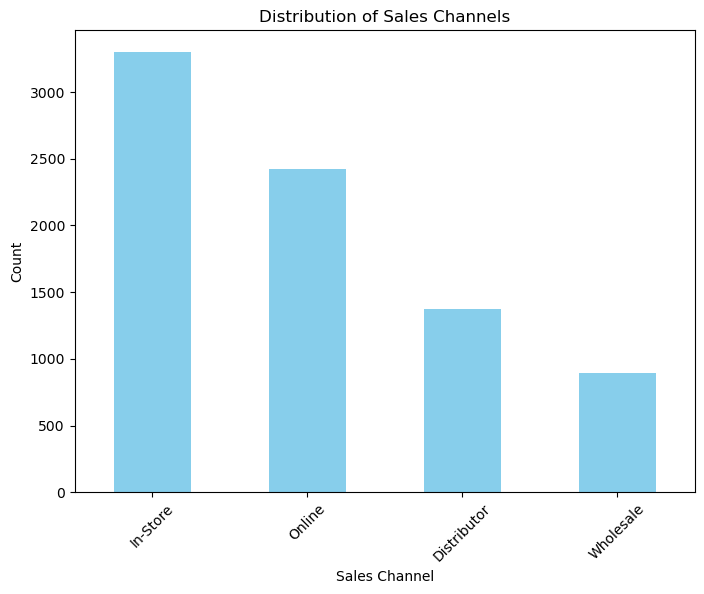

In [13]:
# Count the occurrences of each sales channel
sales_channel_counts = data['SalesChannel'].value_counts()

# Create a bar plot to visualize the distribution
plt.figure(figsize=(8, 6))
sales_channel_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Sales Channels')
plt.xlabel('Sales Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The greater number of sales orders is through In-Store and the least as expected is Wholesale. There is also potential for channelling sales through online platforms as technological advancements are reaching greater heights.

#### Order Quantity Analysis

Analysing the distribution of order quantities to understand common order sizes.

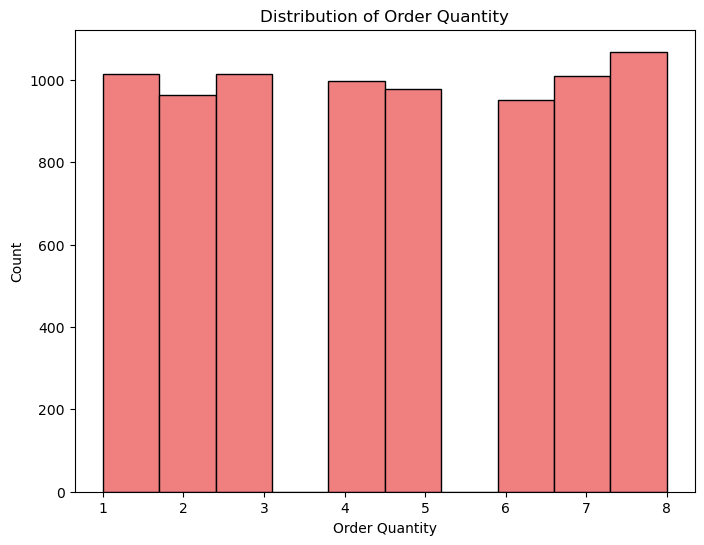

In [14]:
# Create a histogram for order quantity
plt.figure(figsize=(8, 6))
plt.hist(data['OrderQuantity'], bins=10, color='lightcoral', edgecolor='black')
plt.title('Distribution of Order Quantity')
plt.xlabel('Order Quantity')
plt.ylabel('Count')
plt.show()

### Discount Analysis

Analysing the distribution of applied discounts.

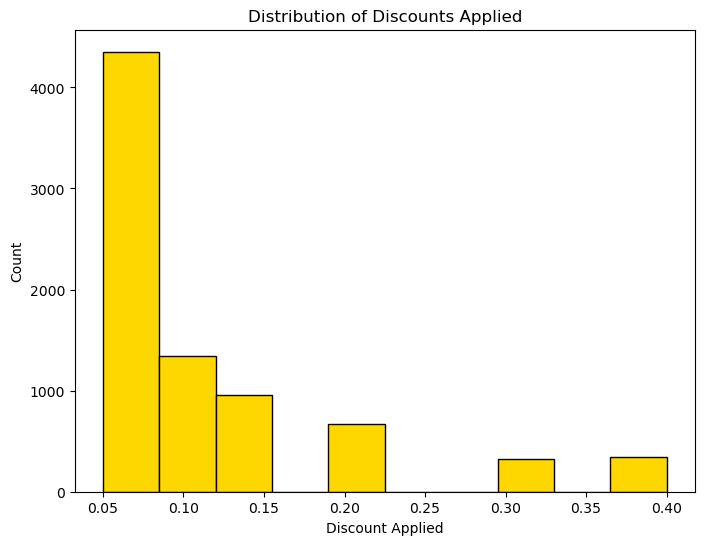

In [15]:
# Create a histogram for discount applied
plt.figure(figsize=(8, 6))
plt.hist(data['DiscountApplied'], bins=10, color='gold', edgecolor='black')
plt.title('Distribution of Discounts Applied')
plt.xlabel('Discount Applied')
plt.ylabel('Count')
plt.show()

The mostpopular discount is 5%. The discounts stretch to 40% being the maximum. However, there is need for futher investigation interms checking the distribution of discounts relative to the sales channel. 

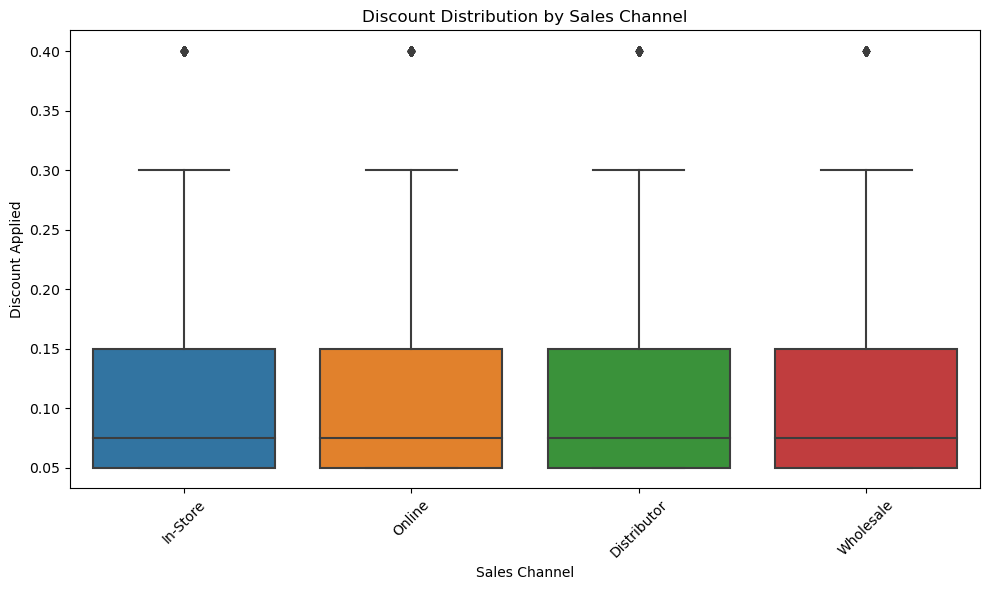

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='SalesChannel', y='DiscountApplied', data=data)

# Add labels and title
plt.xlabel('Sales Channel')
plt.ylabel('Discount Applied')
plt.title('Discount Distribution by Sales Channel')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

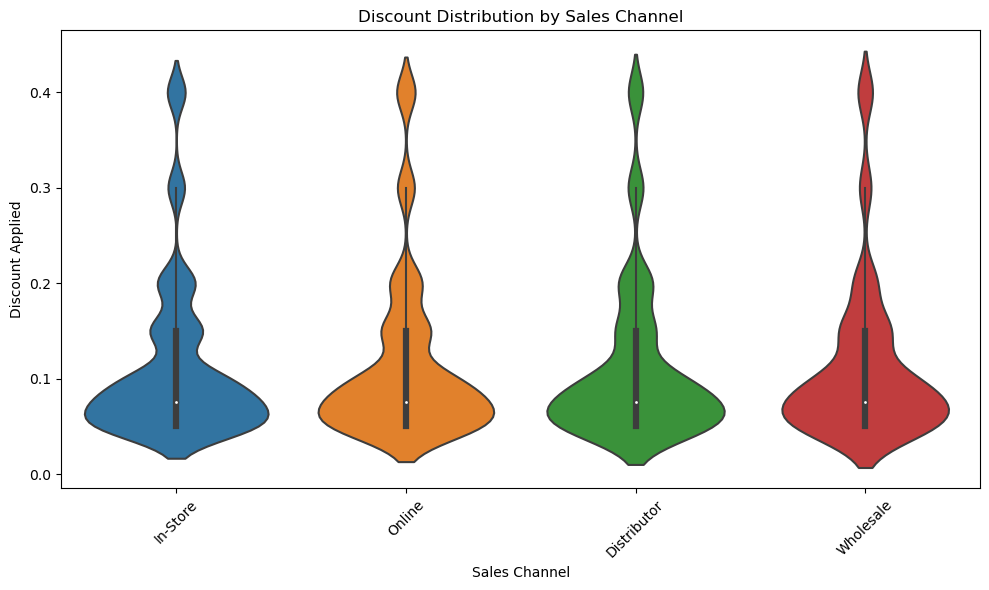

In [17]:
# Create a violin plot to analyze discount distribution by sales channel
plt.figure(figsize=(10, 6))
sns.violinplot(x='SalesChannel', y='DiscountApplied', data=data)
plt.title('Discount Distribution by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Discount Applied')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

The distributions of the discount applied per sales channel are not distinct. There is more of 40% discounts on the online channel than others. a significant number of transactions within the online sales channel received discounts at 40% Value.

#### Price vs. Cost Analysis

Visualising the relationship between unit price and unit cost.

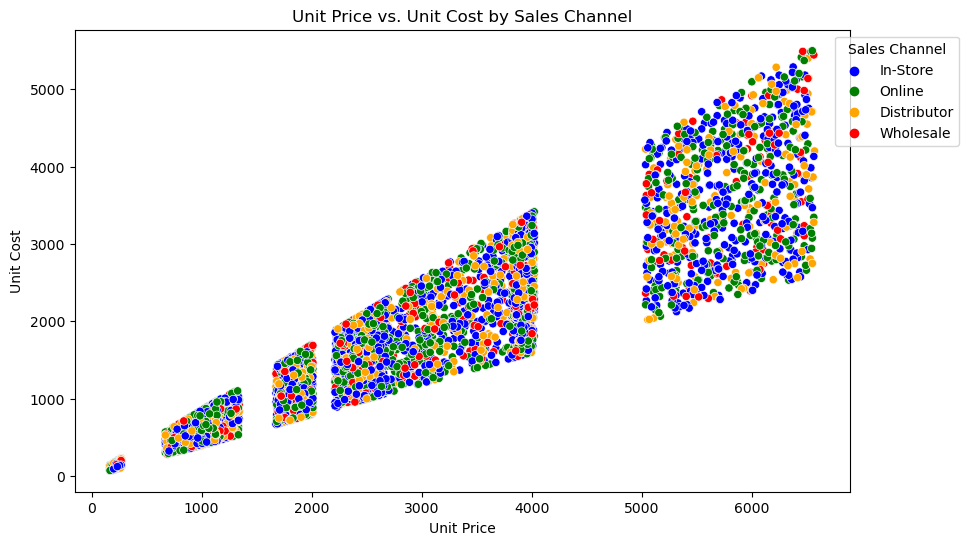

In [18]:
# Define a list of colors for different sales channels
channel_colors = {'In-Store': 'blue', 'Online': 'green', 'Distributor': 'orange', 'Wholesale': 'red'}

# Create a scatter plot of unit price vs. unit cost with different colors for each sales channel
plt.figure(figsize=(10, 6))
sns.scatterplot(x='UnitPrice', y='UnitCost', hue='SalesChannel', data=data, palette=channel_colors)
plt.title('Unit Price vs. Unit Cost by Sales Channel')
plt.xlabel('Unit Price')
plt.ylabel('Unit Cost')
plt.legend(title='Sales Channel', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

The plot helps analyze the relationship between unit price and unit cost for products across different sales channels. There is a linear relationship/trend in how unit price and unit cost vary by channel.

#### Sales Over Time

Visualize how sales orders have evolved over time.

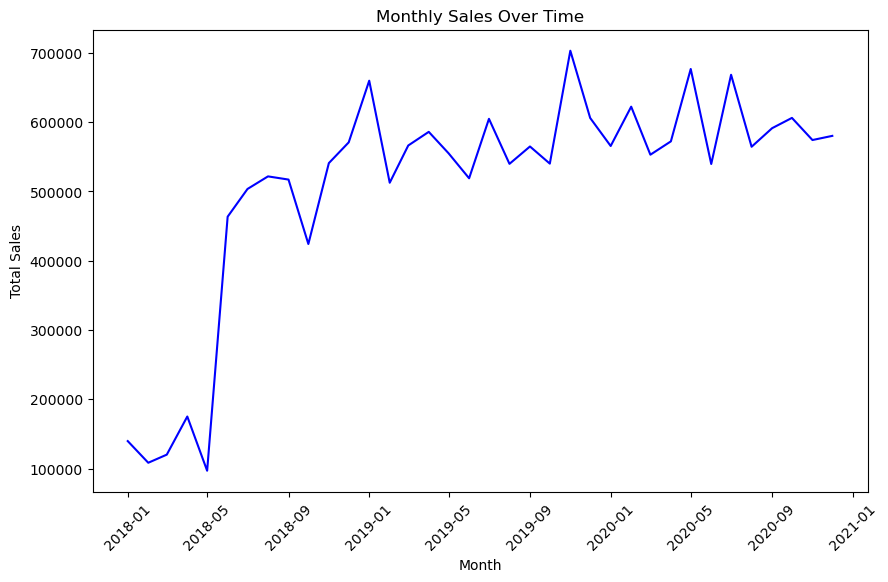

In [21]:
# Convert date columns to datetime objects
data['OrderDate'] = pd.to_datetime(data['OrderDate'])

# Extract month and week from the OrderDate column
data['Month'] = data['OrderDate'].dt.to_period('M')
data['Week'] = data['OrderDate'].dt.to_period('W')

# Calculate monthly sales
monthly_sales = data.groupby('Month')['UnitPrice'].sum().reset_index()

# Create a figure and axis for plotting
fig, axes = plt.subplots(1, 1, figsize=(10, 6))

# Convert 'Month' to datetime format for plotting
monthly_sales['Month'] = monthly_sales['Month'].dt.to_timestamp()

# Plot monthly sales over time
sns.lineplot(x=monthly_sales['Month'], y='UnitPrice', data=monthly_sales, ax=axes, color='blue')
axes.set_title('Monthly Sales Over Time')
axes.set_xlabel('Month')
axes.set_ylabel('Total Sales')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

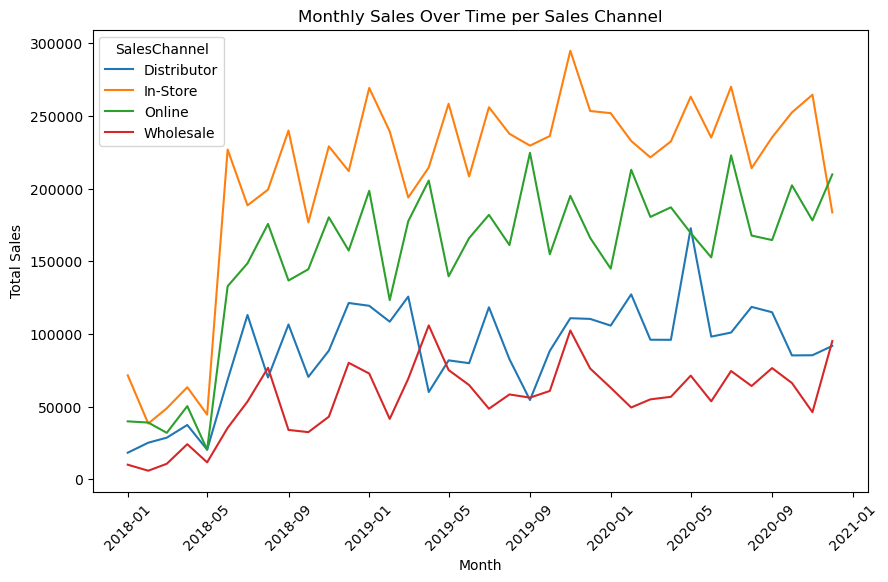

In [22]:
# Calculate monthly sales per sales channel
monthly_sales_channel = data.groupby(['Month', 'SalesChannel'])['UnitPrice'].sum().reset_index()

# Convert 'Month' to datetime format for plotting
monthly_sales_channel['Month'] = monthly_sales_channel['Month'].dt.to_timestamp()

# Create a figure and axis for plotting
fig, axes = plt.subplots(1, 1, figsize=(10, 6))

# Plot monthly sales over time per sales channel
sns.lineplot(x='Month', y='UnitPrice', hue='SalesChannel', data=monthly_sales_channel, ax=axes)
axes.set_title('Monthly Sales Over Time per Sales Channel')
axes.set_xlabel('Month')
axes.set_ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

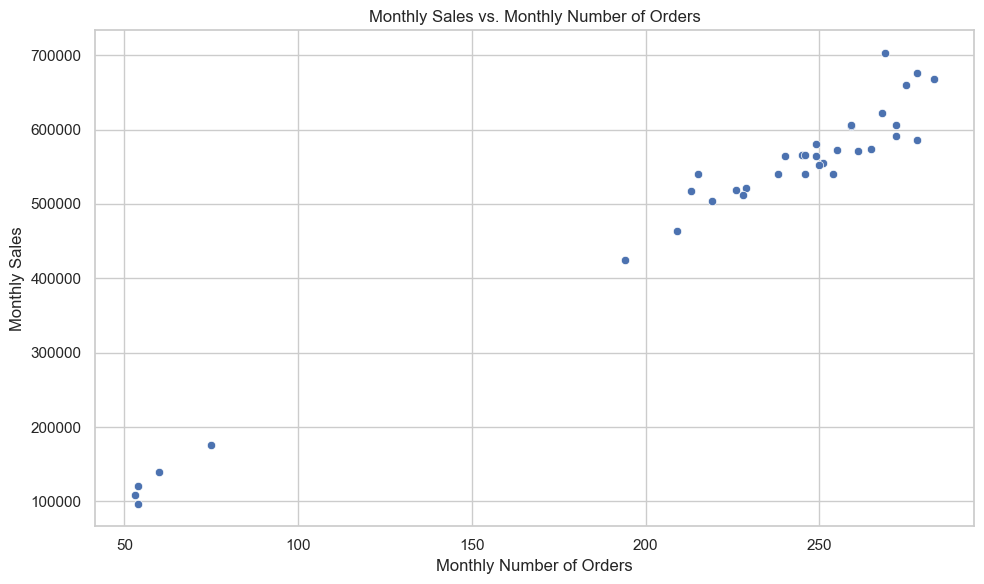

In [ ]:
# Convert date columns to datetime objects
data['OrderDate'] = pd.to_datetime(data['OrderDate'])

# Extract month from the OrderDate column
data['Month'] = data['OrderDate'].dt.to_period('M')

# Calculate monthly sales
monthly_sales = data.groupby('Month')['UnitPrice'].sum().reset_index()

# Calculate monthly number of orders
monthly_orders = data.groupby('Month')['OrderNumber'].count().reset_index()
monthly_orders = monthly_orders.rename(columns={'OrderNumber': 'NumberOfMonthlyOrders'})

# Create a scatter plot of monthly sales vs. monthly number of orders
plt.figure(figsize=(10, 6))
sns.scatterplot(x=monthly_orders['NumberOfMonthlyOrders'], y=monthly_sales['UnitPrice'])
plt.title('Monthly Sales vs. Monthly Number of Orders')
plt.xlabel('Monthly Number of Orders')
plt.ylabel('Monthly Sales')

# Show the plot
plt.tight_layout()
plt.show()

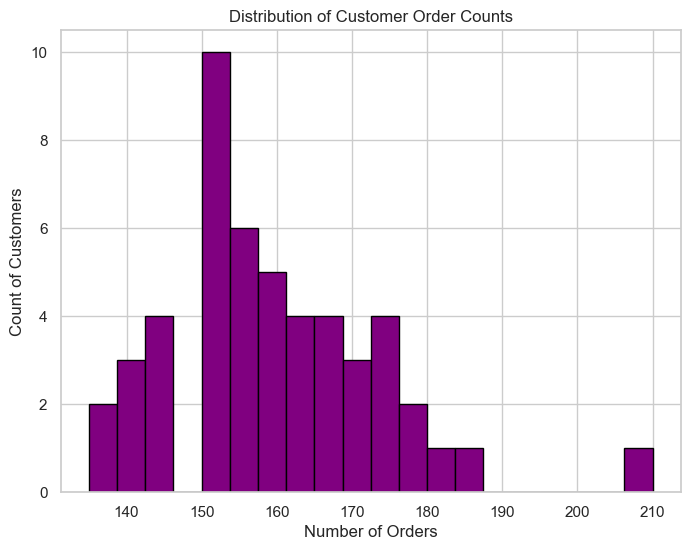

In [ ]:
# Count the number of orders per customer
customer_order_counts = data['CustomerID'].value_counts()

# Create a histogram to visualize customer distribution
plt.figure(figsize=(8, 6))
plt.hist(customer_order_counts, bins=20, color='purple', edgecolor='black')
plt.title('Distribution of Customer Order Counts')
plt.xlabel('Number of Orders')
plt.ylabel('Count of Customers')
plt.show()

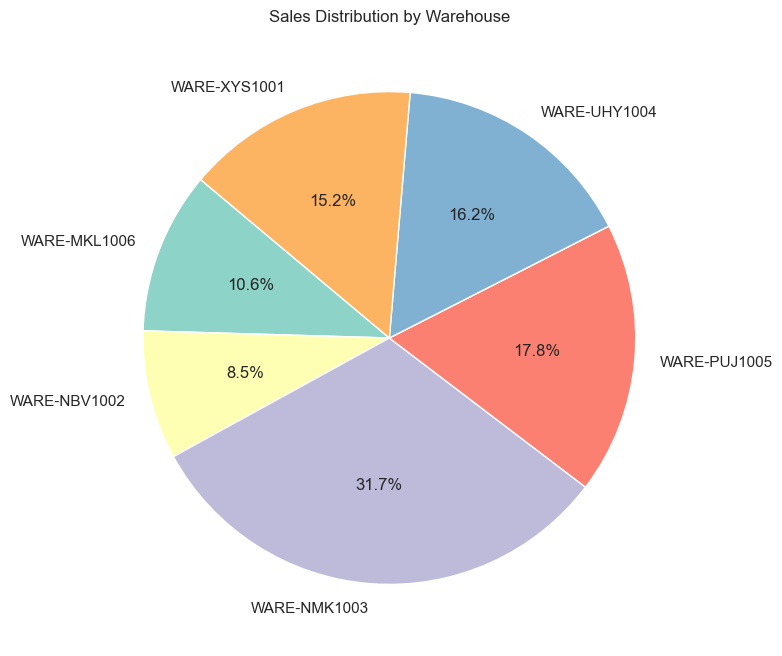

In [ ]:
# Group data by warehouse and calculate total sales
warehouse_sales = data.groupby('WarehouseCode')['UnitPrice'].sum()

# Set a custom color palette for the pie chart
colors = sns.color_palette("Set3", len(warehouse_sales))

# Create a pie chart to visualize sales distribution by warehouse
plt.figure(figsize=(8, 8))
plt.pie(warehouse_sales, labels=warehouse_sales.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Sales Distribution by Warehouse')
plt.show()

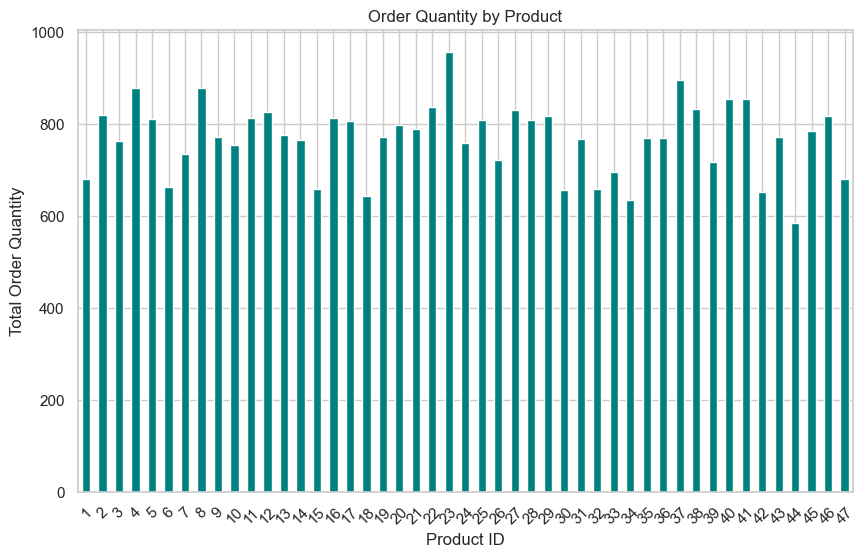

In [ ]:
# Group data by product and calculate total order quantity
product_order_quantity = data.groupby('ProductID')['OrderQuantity'].sum()

# Create a bar plot to visualize order quantities by product
plt.figure(figsize=(10, 6))
product_order_quantity.plot(kind='bar', color='teal')
plt.title('Order Quantity by Product')
plt.xlabel('Product ID')
plt.ylabel('Total Order Quantity')
plt.xticks(rotation=45)
plt.show()

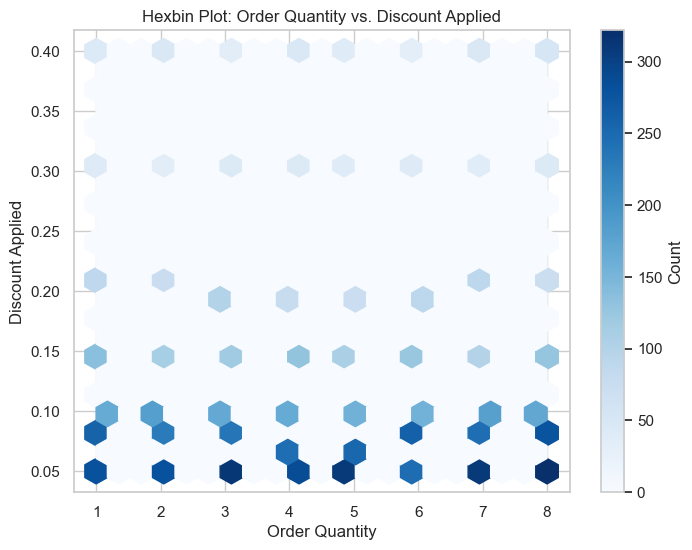

In [ ]:
# Create a hexbin plot of order quantity vs. discount applied
plt.figure(figsize=(8, 6))
plt.hexbin(data['OrderQuantity'], data['DiscountApplied'], gridsize=20, cmap='Blues')
plt.title('Hexbin Plot: Order Quantity vs. Discount Applied')
plt.xlabel('Order Quantity')
plt.ylabel('Discount Applied')
plt.colorbar(label='Count')  # Add a colorbar to indicate point density
plt.show()

In [ ]:
# List of categorical columns to one-hot encode
categorical_cols = ['WarehouseCode', 'CurrencyCode']

# Use pd.get_dummies to perform one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# drop_first=True drops the first category in each encoded column to avoid multicollinearity

# Print the first few rows of the encoded DataFrame
print(data_encoded.head())

   OrderNumber SalesChannel ProcuredDate  OrderDate    ShipDate DeliveryDate  \
0  SO - 000101     In-Store   31/12/2017 2018-05-31  14/06/2018   19/06/2018   
1  SO - 000102       Online   31/12/2017 2018-05-31  22/06/2018   02/07/2018   
2  SO - 000103  Distributor   31/12/2017 2018-05-31  21/06/2018   01/07/2018   
3  SO - 000104    Wholesale   31/12/2017 2018-05-31  02/06/2018   07/06/2018   
4  SO - 000105  Distributor   10/04/2018 2018-05-31  16/06/2018   26/06/2018   

   SalesTeamID  CustomerID  StoreID  ProductID  ...  DiscountApplied  \
0            6          15      259         12  ...            0.075   
1           14          20      196         27  ...            0.075   
2           21          16      213         16  ...            0.050   
3           28          48      107         23  ...            0.075   
4           22          49      111         26  ...            0.100   

   UnitPrice  UnitCost    Month                   Week  \
0     1963.1   1001.18  2018

C:\Users\HP\AppData\Local\Temp\ipykernel_5200\3128772193.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_encoded.corr()


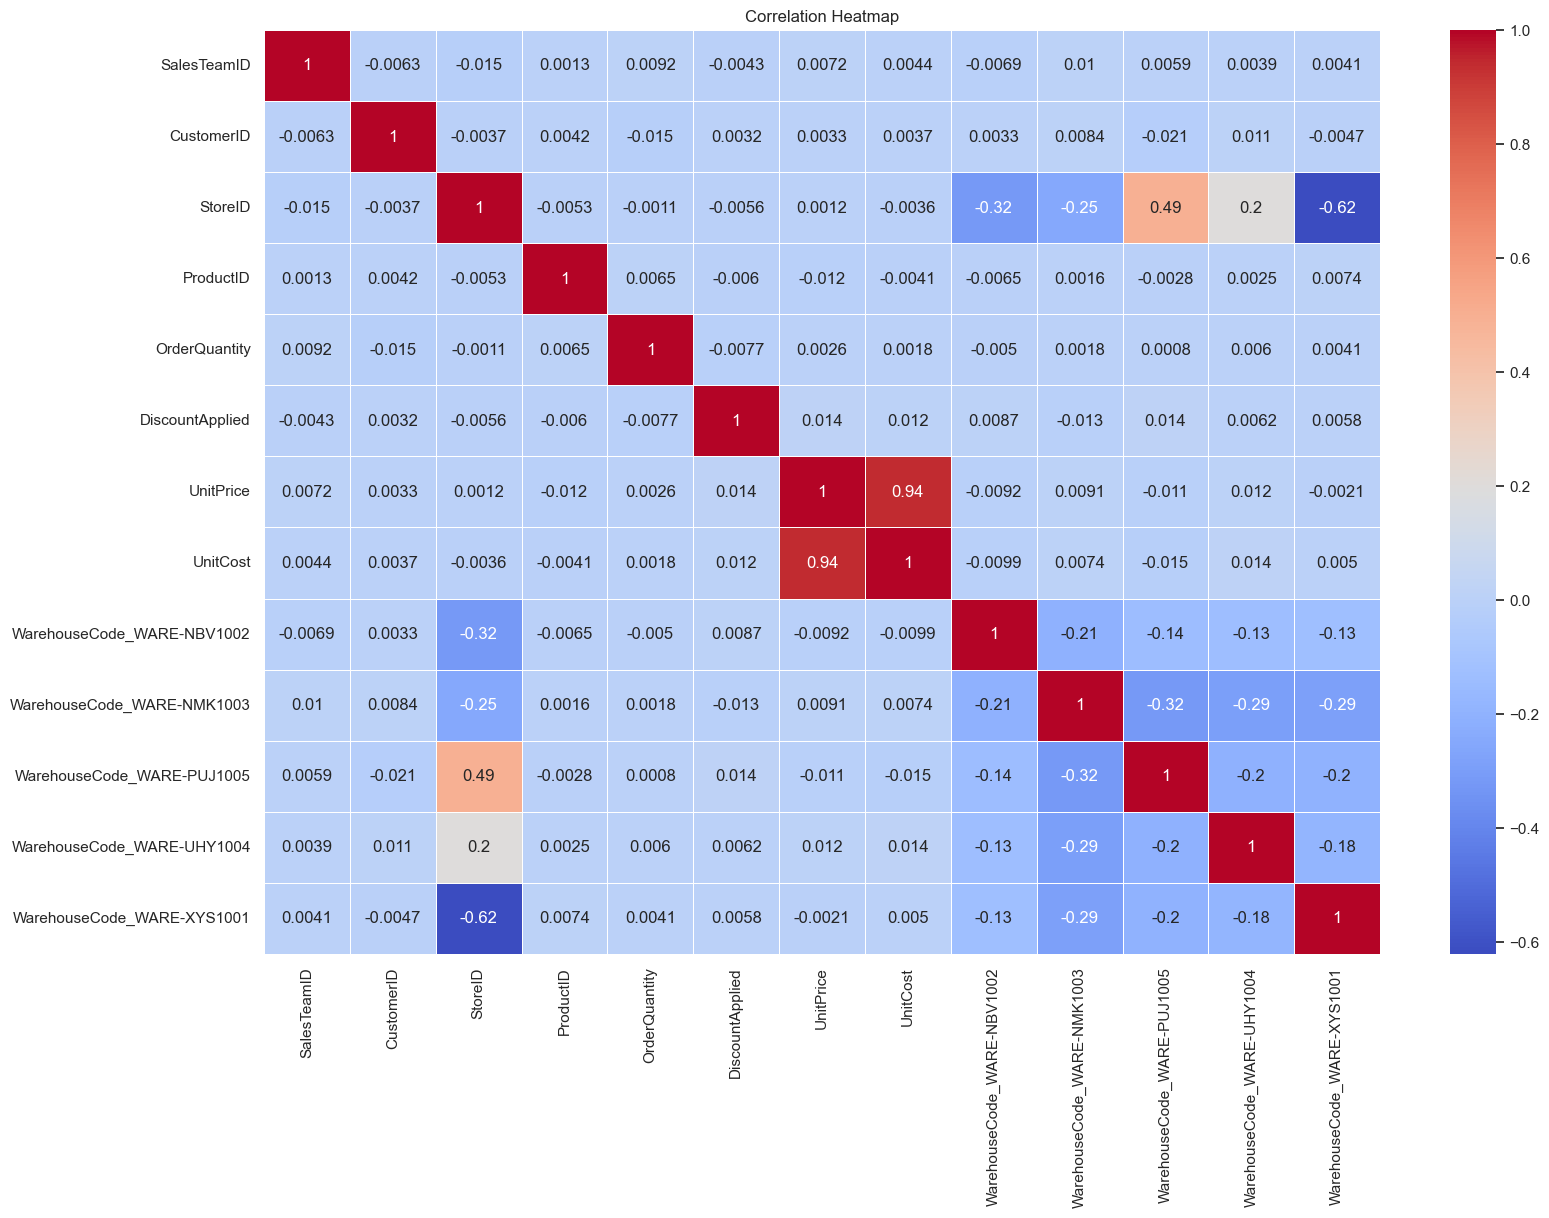

In [ ]:
# Checking the relationships among variables using correlation

# Calculate the correlation matrix
correlation_matrix = data_encoded.corr()

# Create a heatmap
plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**Linear Regression to Predict Sales Quantity:**

Objective: Linear regression is used to predict a continuous numerical target variable. In this case, we're predicting the sales quantity (OrderQuantity) based on features like UnitPrice and DiscountApplied.


In [ ]:
# Feature engineering to create Sales Column 
data['Sales'] = data['OrderQuantity'] * data['UnitPrice']

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     3297.
Date:                Thu, 31 Aug 2023   Prob (F-statistic):               0.00
Time:                        14:42:53   Log-Likelihood:                -77303.
No. Observations:                7991   AIC:                         1.546e+05
Df Residuals:                    7976   BIC:                         1.547e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

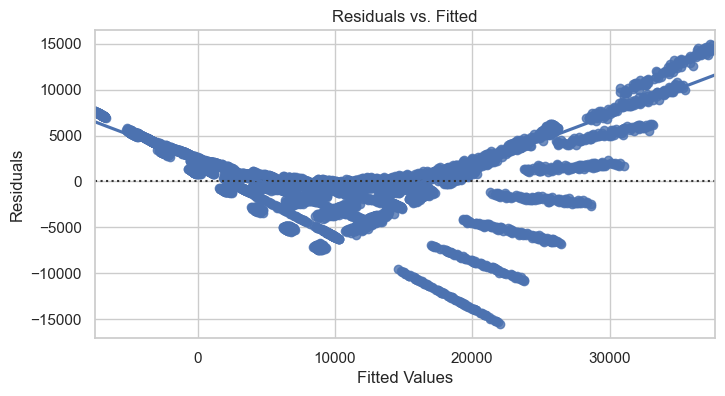

In [ ]:
import statsmodels.api as sm

# Selecting the specified predictors
selected_predictors = ['SalesChannel', 'WarehouseCode','SalesTeamID',
                        'StoreID', 'OrderQuantity', 'DiscountApplied', 'UnitPrice', 'UnitCost']

# Subsetting the DataFrame with the selected predictors and the target variable 'Sales'
df = data[selected_predictors + ['Sales']]

# Encoding categorical variables (SalesChannel and WarehouseCode) using dummy variables
data_encoded = pd.get_dummies(df, columns=['SalesChannel', 'WarehouseCode'], drop_first=True)

# Splitting predictors and target
X = data_encoded.drop('Sales', axis=1)
y = data_encoded['Sales']

# Add a constant (intercept) term to the model
X = sm.add_constant(X)

# Fit the multiple regression model
model = sm.OLS(y, X).fit()

# Display the summary results table
print(model.summary())

# Plot the residuals vs. fitted values
plt.figure(figsize=(8, 4))
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True)
plt.title('Residuals vs. Fitted')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

The R-squared value measures the percentage of variance in Sales that can be explained by the independent variables. In this model, the R-squared value is 0.853, showing that about 85.3% of the variance in Sales can be explained by the predictors. A higher R-squared value is generally preferred. Adjusted R-squared also helps in accounting for overfitting and is calculated based on the number of predictors in the model. In this case, it is 0.852, which is very close to the R-squared value.

The F-statistic tests the significance of the model by comparing its performance to a null model (a model with no predictors). A large F-statistic and a small p-value suggest that the model as a whole is significant. In this summary, the F-statistic is 3297, and the p-value is close to 0, indicating the model's significance.

Coefficients represent the estimated effect of each predictor on Sales. The constant term or intercept is -9773.8711, which represents the estimated Sales when all other predictors are zero. OrderQuantity and UnitPrice have low p-values, indicating their significance in predicting Sales. Other predictors have p-values above 0.05, suggesting they may not be statistically significant.

The Omnibus test checks the normality assumption of the model. A small p-value (close to 0 in this case) suggests that the model may not be normally distributed. The Durbin-Watson statistic tests for the presence of autocorrelation in the residuals and is approximately 2.028, indicating minimal autocorrelation. The JB test checks the model's assumption of normality, and a small p-value (close to 0 in this case) suggests that the residuals are not normally distributed.

AIC and BIC are information criteria used for model selection, and lower values indicate a better-fitting model. Overall, the model explains a significant portion of the variance in Sales, with OrderQuantity and UnitPrice being the most significant predictors. However, some other predictors may not be statistically significant in explaining Sales, as indicated by their higher p-values. To improve the model's performance, you may consider refining it by removing less significant predictors or exploring interactions between variables.

#### Getting the important features through feature importance

#### Logistic Regression to Predict SalesChannel (Binary Classification):

Objective: Logistic Regression is a popular algorithm for binary classification tasks. Here, we're predicting a binary outcome, such as whether a sales channel is "Online" or not, based on features like OrderQuantity, DiscountApplied, and UnitPrice.

Explanation: Logistic Regression models the probability of the target variable belonging to a particular class using a logistic (S-shaped) function. It's interpretable and useful when you have a binary classification problem.

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


data['IsOnline'] = (data['SalesChannel'] == 'Online').astype(int)

X = data[['OrderQuantity', 'DiscountApplied', 'UnitPrice']]
y = data['IsOnline']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6960600375234521


c:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


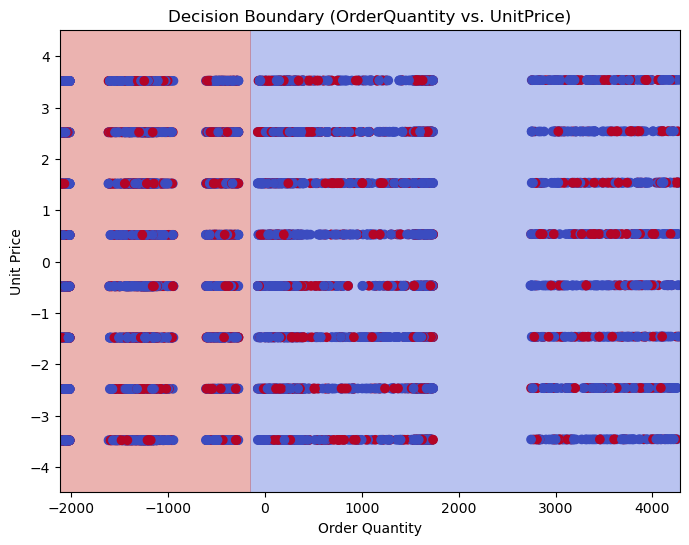

In [39]:
# Create a meshgrid for the decision boundary
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict the class for each point in the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(8, 6))

# Plot decision boundary using 'OrderQuantity' and 'UnitPrice'
ax.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.coolwarm)
ax.set_title('Decision Boundary (OrderQuantity vs. UnitPrice)')
ax.set_xlabel('Order Quantity')
ax.set_ylabel('Unit Price')

plt.show()

#### Optimising the Model 

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt


In [41]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [42]:
# Hyperparameter tuning
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10],'penalty': ['l1', 'l2']}
grid_search = GridSearchCV(LogisticRegression(solver='liblinear', random_state=42), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_


In [43]:
# Predict
y_pred = best_model.predict(X_test_scaled)


In [44]:
# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Model Accuracy: {accuracy}")


Best Model Accuracy: 0.6960600375234521


In [45]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[1113    0]
 [ 486    0]]


In [46]:
# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.70      1.00      0.82      1113
           1       0.00      0.00      0.00       486

    accuracy                           0.70      1599
   macro avg       0.35      0.50      0.41      1599
weighted avg       0.48      0.70      0.57      1599



c:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
# ROC Curve
y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)


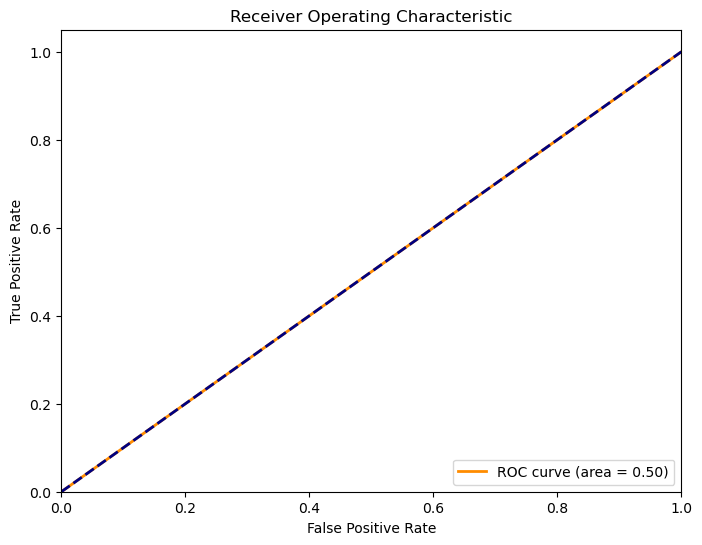

In [49]:
# Visualize ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


the model has high precision and recall for class 0 (IsOnline = 0), indicating that it's good at predicting the negative class. However, it performs very poorly for class 1 (IsOnline = 1), with low precision, recall, and F1-score, indicating that it struggles to correctly predict the positive class. The ROC curve confirms that the model's ability to distinguish between the two classes is essentially random. This suggests that the model may need further optimization or that the data may be imbalanced, requiring special handling techniques such as resampling or using different algorithms.

#### 1. Logistic Regression

Objective: To build a binary classification model to predict repeat purchases.

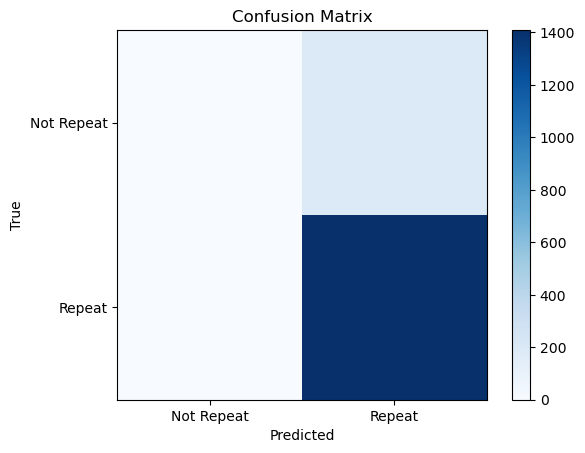

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       190
           1       0.88      1.00      0.94      1409

    accuracy                           0.88      1599
   macro avg       0.44      0.50      0.47      1599
weighted avg       0.78      0.88      0.83      1599



c:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming 'IsRepeatPurchase' is your target variable (1 for repeat, 0 for not)
data['IsRepeatPurchase'] = (data['OrderQuantity'] > 1).astype(int)

# Select relevant columns, including the categorical 'SalesChannel' feature
X = data[['SalesChannel', 'OrderQuantity', 'DiscountApplied']]
y = data['IsRepeatPurchase']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a transformer for one-hot encoding 'SalesChannel'
categorical_features = ['SalesChannel']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

# Create and train the logistic regression model within a pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

# Fit the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Visualizations (confusion matrix)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Not Repeat', 'Repeat'])
plt.yticks([0, 1], ['Not Repeat', 'Repeat'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming 'IsRepeatPurchase' is your target variable (1 for repeat, 0 for not)
data['IsRepeatPurchase'] = (data['OrderQuantity'] > 1).astype(int)

# Select relevant columns, including the categorical 'SalesChannel' feature
X = data[['SalesChannel', 'OrderQuantity', 'DiscountApplied']]
y = data['IsRepeatPurchase']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a transformer for one-hot encoding 'SalesChannel'
categorical_features = ['SalesChannel']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

# Create and train the Gradient Boosting Classifier model within a pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42))])

# Fit the model
model.fit(X_train, y_train)

# Predictions
gb_y_pred = model.predict(X_test)

# Classification report
print(classification_report(y_test, gb_y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       190
           1       0.88      1.00      0.94      1409

    accuracy                           0.88      1599
   macro avg       0.44      0.50      0.47      1599
weighted avg       0.78      0.88      0.83      1599



c:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### K-Means Clustering

Objective: Cluster customers (CustomerID) based on their purchasing behavior (OrderQuantity, DiscountApplied, UnitPrice).

c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

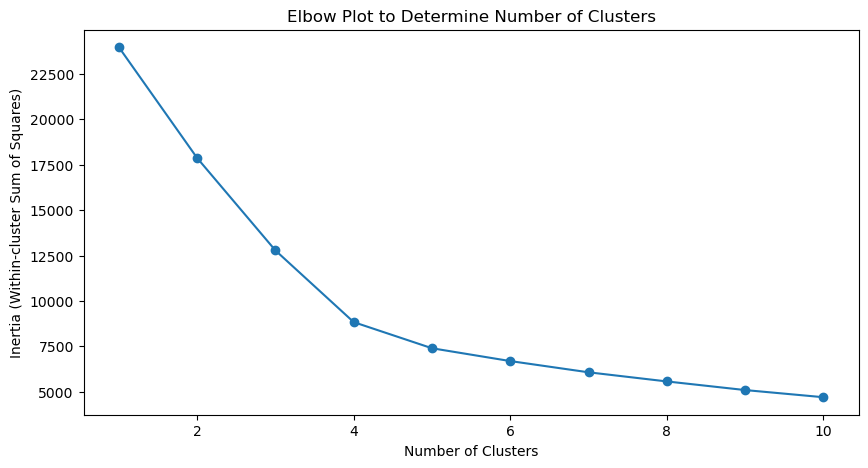

c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


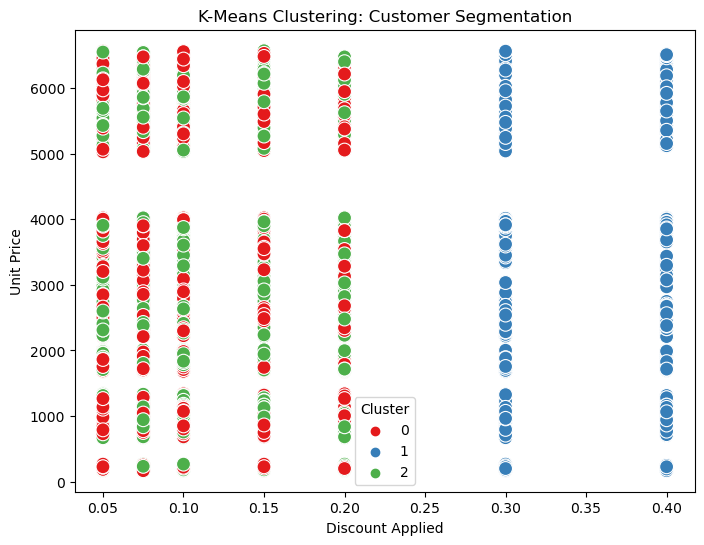

In [61]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
X = data[['OrderQuantity', 'DiscountApplied', 'UnitPrice']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a range of possible cluster numbers for the elbow plot
cluster_range = range(1, 11)
inertia = []  # Sum of squared distances from each point to its assigned center

# Calculate inertia (within-cluster sum of squares) for each cluster number
for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('Elbow Plot to Determine Number of Clusters')
plt.show()

# Based on the elbow plot, choose an appropriate number of clusters
# Let's assume we choose 3 clusters based on the elbow plot
chosen_num_clusters = 3

# Perform K-Means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=chosen_num_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='DiscountApplied', y='UnitPrice', hue='Cluster', data=data, palette='Set1', s=100)
plt.xlabel("Discount Applied")
plt.ylabel("Unit Price")
plt.title("K-Means Clustering: Customer Segmentation")
plt.show()


#### Random Forest Classifier

Objective: Predict whether a customer is online (IsOnline) based on features like OrderQuantity, DiscountApplied, UnitPrice, etc.




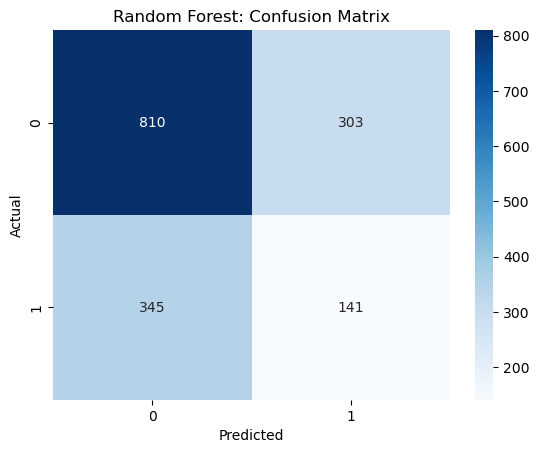

Accuracy: 0.5947467166979362


In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

X = data[['OrderQuantity', 'DiscountApplied', 'UnitPrice']]
y = data['IsOnline']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Visualize confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest: Confusion Matrix")
plt.show()

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
